In [1]:
%matplotlib inline
import vdmlab as vdm
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from core import assign_label, Rat, f_analyze

In [2]:
data_filepath = 'E:\code\emi_biconditional\cache\data'
split_data_filepath = 'E:\code\emi_biconditional\cache\magazine'

In [3]:
sessions = []
for file in sorted(os.listdir(data_filepath)):
    if file[0] == '!':
        sessions.append(os.path.join(data_filepath, file))

rats = ['1', '2', '3', '4', '5', '6', '7', '8']

broken_a = os.path.join(split_data_filepath, '!2016-10-19a1')
broken_b = os.path.join(split_data_filepath, '!2016-10-19a2')
rats_data_a = vdm.load_medpc(broken_a, assign_label)
rats_data_b = vdm.load_medpc(broken_b, assign_label)
for rat in rats_data_a:
    for key in rats_data_a[rat]:
        rats_data_b[rat][key].join(rats_data_a[rat][key])

data = dict()
for rat in rats:
    data[rat] = Rat(rat)
    
for rat in rats:
    data[rat].add_session(**rats_data_b[rat])

n_sessions = len(sessions)+1

for session in sessions:
    rats_data = vdm.load_medpc(os.path.join(data_filepath, session), assign_label)

    for rat in rats:
        data[rat].add_session(**rats_data[rat])

In [18]:
trials_maping = dict(one=1, two=2, three=3, four=4)
for rat in rats:
    for i, session in enumerate(data[rat].sessions):
        trials_count = dict(one=0, two=0, three=0, four=0)
        for trial in session.trials:
            for key in trials_maping:
                if trial.trial_type == trials_maping[key]:
                    trials_count[key] += 1
        if np.all(list(trials_count.values())) < 16:
            print('Rat', rat, trials_count, 'session', i)
            break

Rat 1 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 2 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 3 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 4 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 5 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 6 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 7 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0
Rat 8 {'one': 14, 'four': 14, 'two': 12, 'three': 12} session 0


In [19]:
print(rats_data_a['3']['lights1'].n_epochs, rats_data_a['3']['lights2'].n_epochs, 
      rats_data_a['3']['sounds1'].n_epochs, rats_data_a['3']['sounds2'].n_epochs)

3 3 4 2


In [20]:
print(rats_data_a['4']['lights1'].n_epochs, rats_data_a['4']['lights2'].n_epochs, 
      rats_data_a['4']['sounds1'].n_epochs, rats_data_a['4']['sounds2'].n_epochs)

2 2 2 2


In [23]:
n_sessions = len(data['1'].sessions)

only_sound = False
print(n_sessions)

11


In [24]:
measures = ['durations', 'numbers', 'latency', 'responses']
together = dict(trial=[], rat=[], session=[], trial_type=[], rewarded=[], cue=[], value=[], measure=[], condition=[])

for session in range(n_sessions):
    all_trials = []
    for rat in rats:
        all_trials.extend(data[rat].sessions[session].trials)

        for i, trial in enumerate(all_trials):
            for measure in measures:
                if not only_sound or trial.cue == 'sound':
                    together['trial'].append("%s, %d" % (rat, i))
                    together['rat'].append(rat)
                    together['session'].append(session+1)
                    together['trial_type'].append(trial.trial_type)
                    together['rewarded'].append("%s %s" % (trial.cue, 'rewarded' if trial.trial_type % 2 == 0 else 'unrewarded'))
                    together['cue'].append(trial.cue)
                    together['condition'].append("%s %d" % (trial.cue, trial.trial_type))
                    together['measure'].append(measure)
                    together['value'].append(f_analyze(trial, measure))

df = pd.DataFrame(data=together)

In [ ]:
df.head(10)

In [ ]:
colours = ["#9970ab", "#4393c3", "#762a83", "#b2182b", "#5aae61", "#d6604d", "#1b7837", "#2166ac"]
g = sns.FacetGrid(data=df, col="measure", sharey=False, size=3, aspect=1.)
g.map_dataframe(sns.tsplot, time="session", unit="trial", condition="rewarded", value="value", color=colours)
# legend_dist = 1.5
# g.set_axis_labels("Session", "Value")
# for ax, label in zip(g.axes[0], ["Durations", "Numbers", "Latency", "Responses"]):
#     ax.set_title("")
#     ax.set_ylabel(label)
# plt.tight_layout()
# plt.legend()
plt.show()

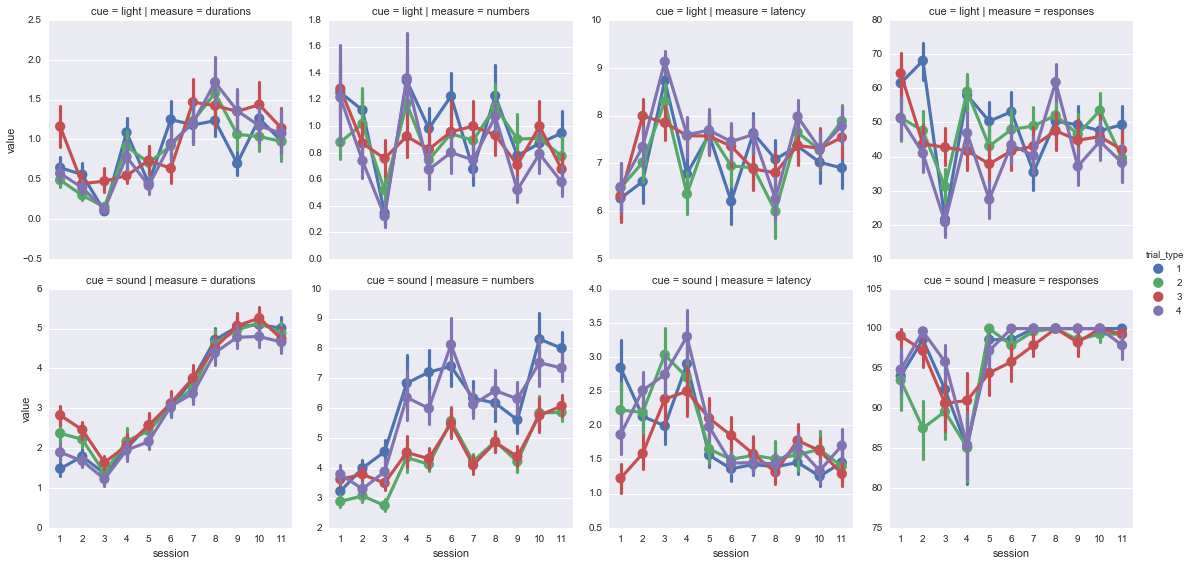

In [25]:
g = sns.factorplot(x="session", 
                   y="value", 
                   col="measure", 
                   hue="trial_type", 
                   row="cue",
                   sharey=False, 
                   kind="point", 
                   data=df)